# lets try to fix some persistant eddy problem
near eachother so HOPEFULLY this is straightforward 

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [5]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

(50.0, 400.0)

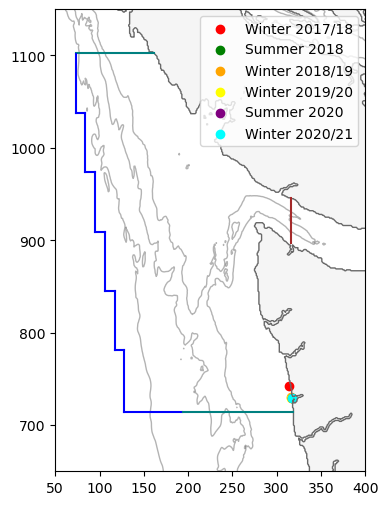

In [30]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the eddy problem spots
ax.scatter([314],[742],c='r', label='Winter 2017/18')
ax.scatter([317],[729],c='g', label='Summer 2018')
ax.scatter([316],[730],c='orange', label='Winter 2018/19')
ax.scatter([316],[729],c='yellow', label='Winter 2019/20')
ax.scatter([317],[729],c='purple', label='Summer 2020')
ax.scatter([317],[729],c='cyan', label='Winter 2020/21')
ax.legend()

# and the new boundaries
plt.plot([316,316], [897,946], c='brown')
plt.plot([ 73,162],[1103,1103], c='teal')
plt.plot([128,193],[ 714, 714], c='b')
plt.plot([117,128],[ 781, 781], c='b')
plt.plot([106,117],[ 845, 845], c='b')
plt.plot([ 95,106],[ 909, 909], c='b')
plt.plot([ 84, 95],[ 974, 974], c='b')
plt.plot([ 73, 84],[1038,1038], c='b')
plt.plot([ 73, 73],[1038,1102], c='b')
plt.plot([ 84, 84],[ 974,1038], c='b')
plt.plot([ 95, 95],[ 909, 974], c='b')
plt.plot([106,106],[ 845, 909], c='b')
plt.plot([117,117],[ 781, 845], c='b')
plt.plot([128,128],[ 714, 781], c='b')
plt.plot([194,319],[ 714, 714], c='teal')

ax.set_ylim([650,1150])
ax.set_xlim([50,400])

(310.0, 340.0)

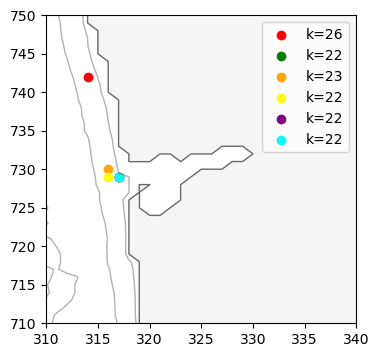

In [31]:
fig, ax = plt.subplots(1,1,figsize=(4, 4))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)

# the eddy problem spots
ax.scatter([314],[742],c='r', label='k=26')
ax.scatter([317],[729],c='g', label='k=22')
ax.scatter([316],[730],c='orange', label='k=23')
ax.scatter([316],[729],c='yellow', label='k=22')
ax.scatter([317],[729],c='purple', label='k=22')
ax.scatter([317],[729],c='cyan', label='k=22')

ax.legend()

ax.set_ylim([710,750])
ax.set_xlim([310,340])

In [5]:
print(grid.mask_u[729,317])
print(grid.mask_v[729,317])
print(grid.mask_rho[729,317])
# all agree that its water

<xarray.DataArray 'mask_u' ()>
array(1.)
<xarray.DataArray 'mask_v' ()>
array(1.)
<xarray.DataArray 'mask_rho' ()>
array(1.)


### Lets check the velocities on a specific day
##### Winter 2018/19

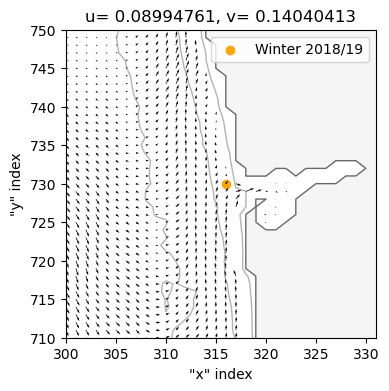

In [49]:
# failed on 2018.09.27/ocean_his_0021.nc, with 66 days left in the run :(
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2018.09.27/ocean_his_0021.nc")

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=23

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([710,750])
ax.set_xlim([300,331])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

#point with error
ax.scatter([316],[730],c='orange', label='Winter 2018/19')
ax.legend(loc="upper right")
ax.set_title('u= '+str(data.u[0,k,730,316].values)+', v= '+str(data.v[0,k,730,316].values))

# QUIVER! 
ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])

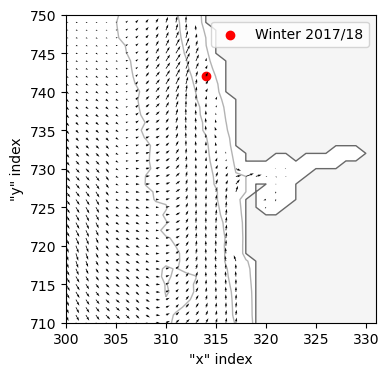

In [37]:
# failed on 2018.09.27/ocean_his_0021.nc, with 66 days left in the run :(
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2018.09.27/ocean_his_0021.nc")

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=26

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([710,750])
ax.set_xlim([300,331])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

#point with error
ax.scatter([314],[742],c='r', label='Winter 2017/18')
ax.legend(loc="upper right")

# QUIVER! 
ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])

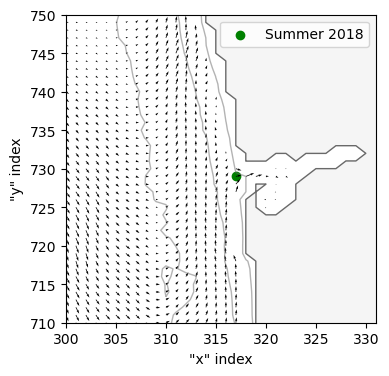

In [38]:
# failed on 2018.09.27/ocean_his_0021.nc, with 66 days left in the run :(
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2018.09.27/ocean_his_0021.nc")

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=22

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([710,750])
ax.set_xlim([300,331])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

#point with error
ax.scatter([317],[729],c='g', label='Summer 2018')
ax.legend(loc="upper right")

# QUIVER! 
ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])

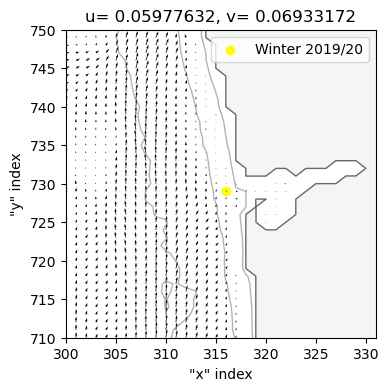

In [47]:
# failed on 2019.12.09/ocean_his_0017.nc
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2019.12.09/ocean_his_0017.nc")

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=22

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([710,750])
ax.set_xlim([300,331])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

#point with error
ax.scatter([316],[729],c='yellow', label='Winter 2019/20')
ax.legend(loc="upper right")
ax.set_title('u= '+str(data.u[0,k,729,316].values)+', v= '+str(data.v[0,k,729,316].values))

# QUIVER! 
ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])

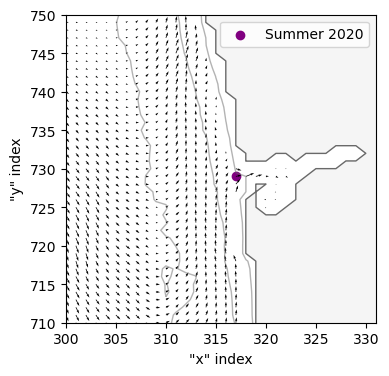

In [40]:
# failed on 2018.09.27/ocean_his_0021.nc, with 66 days left in the run :(
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2018.09.27/ocean_his_0021.nc")

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=22

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([710,750])
ax.set_xlim([300,331])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

#point with error
ax.scatter([317],[729],c='purple', label='Summer 2020')
ax.legend(loc="upper right")

# QUIVER! 
ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])

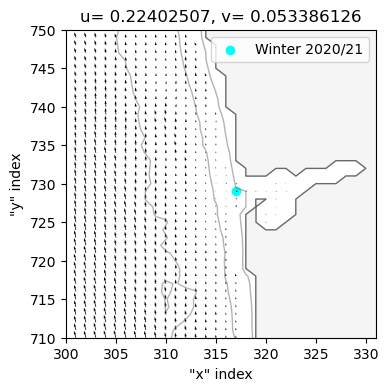

In [48]:
# failed on 2020.12.13/ocean_his_0018
data = xr.open_dataset("/data1/parker/LO_roms/cas6_v0_live/f2020.12.13/ocean_his_0018.nc")

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=22

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([710,750])
ax.set_xlim([300,331])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

#point with error
ax.scatter([317],[729],c='cyan', label='Winter 2020/21')
ax.legend(loc="upper right")
ax.set_title('u= '+str(data.u[0,k,729,317].values)+', v= '+str(data.v[0,k,729,317].values))

# QUIVER! 
ax.quiver(X[710:751,300:332],Y[710:751,300:332],data.u[0,k,710:751,300:332],data.v[0,k,710:751,300:332])